In [1]:
import numpy as np 
import os
import time
import math
from functools import partial
import torch
os.chdir('/home/sarvagya/SEG-rc/')

# Speed Comparison
#### (Gaussian blur vs EMA)

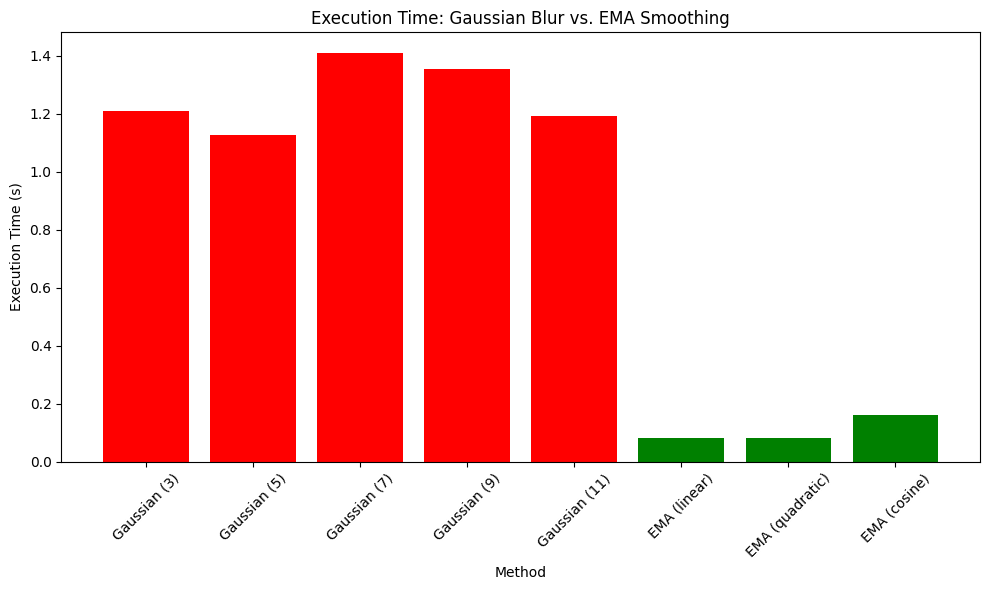

In [3]:
import torch
import time
import math
import matplotlib.pyplot as plt
from functools import partial
from diffusion_utils.blur import gaussian_blur_2d, ema_smoothing_time_dependent, alpha_increasing

# Create a fixed tensor for testing; e.g., shape (batch, channels, height, width)
tensor = torch.randn(3, 20, 1024, 64, dtype=torch.float64)

# Set sigma for the Gaussian blur.
sigma = 10

# ---------------------
# Gaussian Blur Timing
# ---------------------
# Define a list of kernel sizes to test.
kernel_sizes = [3, 5, 7, 9, 11]
gaussian_times = []

for kernel in kernel_sizes:
    start_time = time.time()
    _ = gaussian_blur_2d(tensor, sigma, kernel)
    elapsed = time.time() - start_time
    gaussian_times.append(elapsed)

# ---------------------
# EMA Smoothing Timing
# ---------------------
# Define the different modes to test.
modes = ["linear", "quadratic", "cosine"]
ema_times = []

# For each mode, define the corresponding alpha function and measure the time.
for mode in modes:
    alpha_fn = partial(alpha_increasing, alpha_start=0.8, alpha_end=0.99, mode=mode)
    start_time = time.time()
    _ = ema_smoothing_time_dependent(query=tensor, alpha_fn=alpha_fn)
    elapsed = time.time() - start_time
    ema_times.append(elapsed)

# ---------------------
# Combine and Plot the Results in a Single Plot
# ---------------------
# Create x-axis labels for both methods.
x_labels = [f"Gaussian ({k})" for k in kernel_sizes] + [f"EMA ({m})" for m in modes]
# Concatenate the timings.
times = gaussian_times + ema_times
# Define colors: red for Gaussian and green for EMA.
colors = ['red'] * len(gaussian_times) + ['green'] * len(ema_times)

plt.figure(figsize=(10, 6))
plt.bar(x_labels, times, color=colors)
plt.xlabel("Method")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time: Gaussian Blur vs. EMA Smoothing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
